# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [15]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose as sm_tsa_seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isna().sum()
# sensor.dropna(inplace=True)
# There is no missing data.


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:
# Your code here:
sensor['dates'] = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=sensor.shape[0])
freq = pd.infer_freq(sensor['dates'])
print(freq)
sensor.sample()


S


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,dates
346,1.35776,-0.935706,-2.385544,0.579839,0.805018,-0.12543,-2.269714,2.911195,-1.501581,0.553004,0.144186,-0.491315,2018-01-01 00:05:46


Assign the time series index to the dataframe's index.

In [8]:
# Your code here:
sensor.set_index('dates', inplace=True)
sensor.sample()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
dates,,,,,,,,,,,,
2018-01-01 00:02:06,0.958961,-0.841188,2.352217,0.545657,0.745436,-0.382863,-0.629478,-1.822981,0.815993,0.936719,-0.341474,-0.195033


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

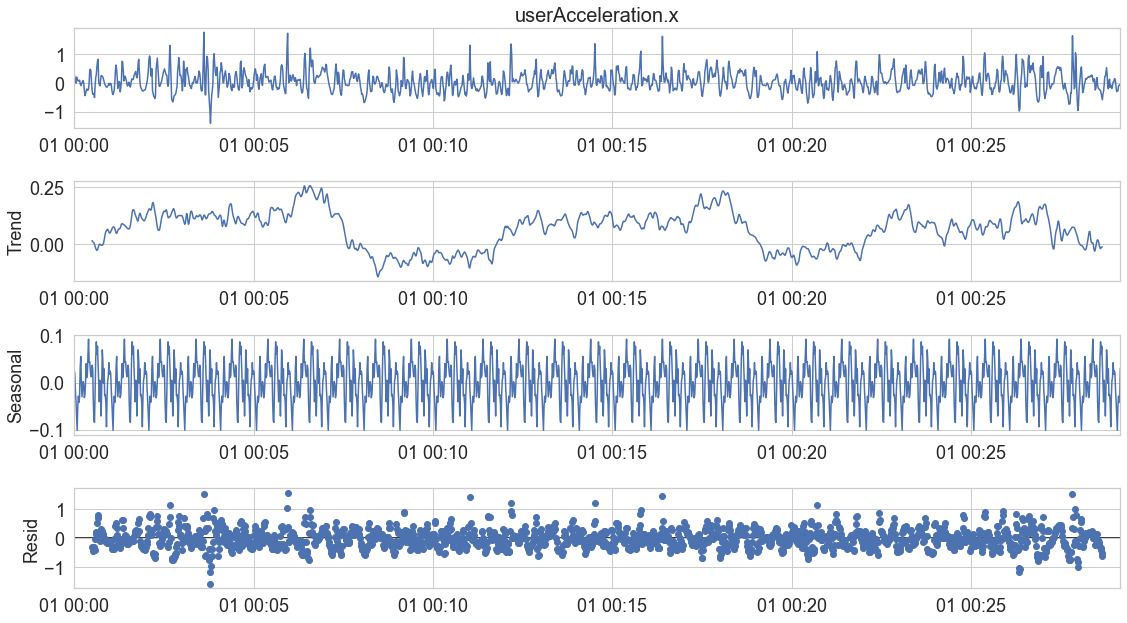

In [18]:
# Your code here:
descompose = sm_tsa_seasonal_decompose(sensor['userAcceleration.x'], period = 60, model="additive")
descompose.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

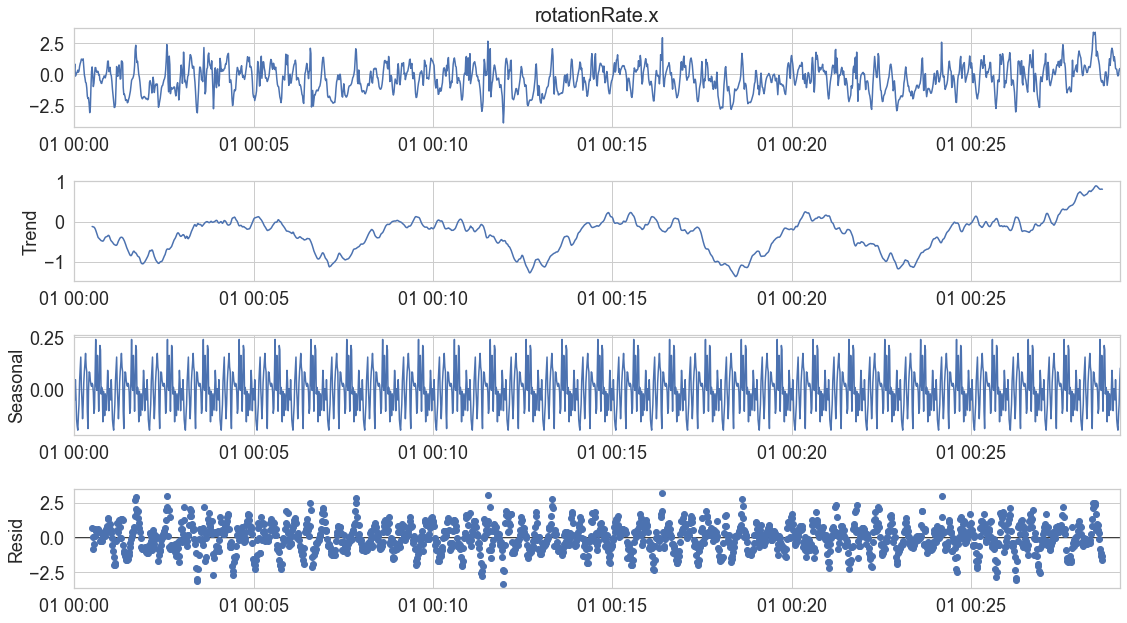

In [19]:
descompose = sm_tsa_seasonal_decompose(sensor['rotationRate.x'], period = 60, model="additive")
descompose.plot()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

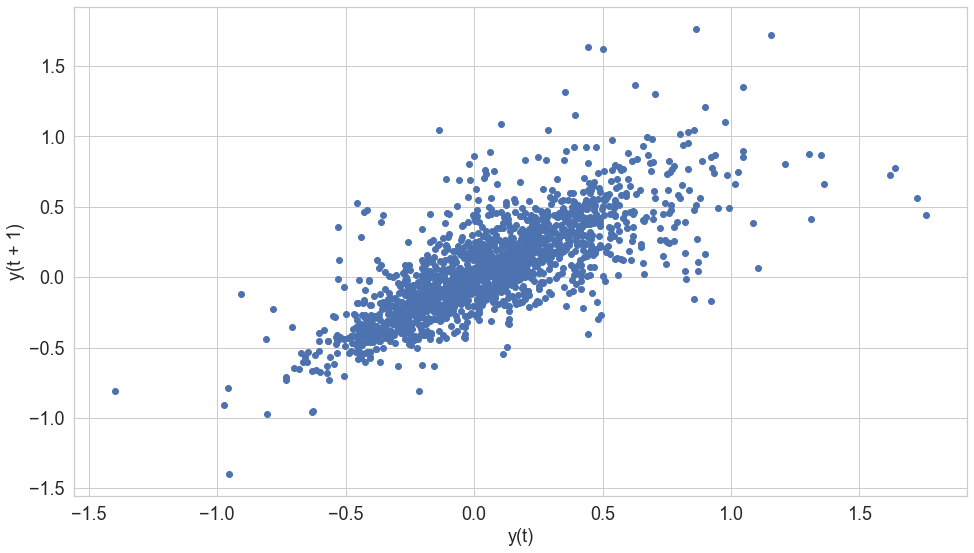

In [20]:
# Your code here:

pd.plotting.lag_plot(sensor['userAcceleration.x'])


Create a lag plot for `rotationRate.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

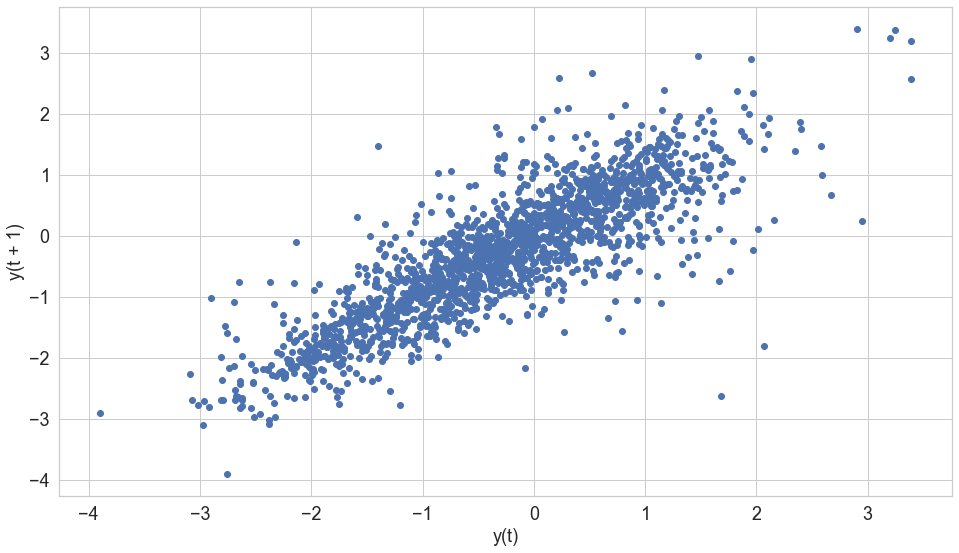

In [21]:
# Your code here:
pd.plotting.lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

Your conclusions here:
1. A lag in a time-series data is how much one point is falling behind in time from another data point.
2. In a time-series data, data points are marked over time at varying degrees of intervals.
3. To analyse and find out if a time-series data follows any pattern, a lag plot can be employed.
4. A lag plot is drawn by representing the time series data in x-axis and the lag of the time series data point in y axis.
5. For a data point, if the order of the lag is one, the lag is the previous data point. If the lag is two, the lag is data point before two data points in time.
6. By drawing a lag plot, patterns like randomness, trends and seasonality can be searched for.
7. In booth cases we aprreciate a correlation.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [22]:
# Your code here:

# Your code here:
res1 = adfuller(sensor['userAcceleration.x'])
adf, pvalue, usedlag, nobs, critical_values, icbest = res1
results1 = {'adf': adf,
           'pvalue':pvalue,
           'usedlag':usedlag,
           'nobs':nobs,
           'critical_values':critical_values,
           'icbest':icbest}
results1

{'adf': -17.957994086169762,
 'pvalue': 2.823439483037483e-30,
 'usedlag': 4,
 'nobs': 1746,
 'critical_values': {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 'icbest': -727.6140124402791}

In [24]:
res2 = adfuller(sensor['rotationRate.x'])
adf, pvalue, usedlag, nobs, critical_values, icbest = res2
results2 = {'adf': adf,
           'pvalue':pvalue,
           'usedlag':usedlag,
           'nobs':nobs,
           'critical_values':critical_values,
           'icbest':icbest}
results2

{'adf': -5.2698606250864355,
 'pvalue': 6.320230335911768e-06,
 'usedlag': 25,
 'nobs': 1725,
 'critical_values': {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 'icbest': 2619.6049719981947}

What are your conclusions from this test?

Your conclusions here:

**userAcceleration.x**

If our adf was < "-3.434100824760071", we can reject that the series is not stationary and there is a statistical significant trend being 99% sure, if it was bigger but still smaller than "-2.863196780129223", we will be 95% sure; finally, if it was greater than "-2.5676520210882936", we will be 90% sure.

**rotationRate.x**

If our adf was < "-3.4341465551936534", we can reject that the series is not stationary and there is a statistical significant trend being 99% sure, if it was bigger but still smaller than "-2.863216966926812", we will be 95% sure; finally, if it was greater than "-2.567662770090317", we will be 90% sure.

**In both cases**

Alternatively, we can look at the p-value and compare it with a predefine confidence interval alpha (usually 5%). If p_value > alpha (0.05), we accept there is a statistical significant trend.

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
order = (2, 0, 1)

In [ ]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [ ]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html



In [ ]:
# 2. Fit the model:



In [ ]:
# 3. Predict: create y_pred:


In [ ]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

# rmse(y_pred, y_test)